In [2]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
% matplotlib inline

In [22]:
train_2016 = pd.read_csv('input/train_2016_v2.csv', index_col='transactiondate', parse_dates = ['transactiondate'])
print(train_2016.info())
print(train_2016.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90275 entries, 2016-01-01 to 2016-12-30
Data columns (total 2 columns):
parcelid    90275 non-null int64
logerror    90275 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.1 MB
None
                 parcelid  logerror
transactiondate                    
2016-01-01       11016594    0.0276
2016-01-01       14366692   -0.1684
2016-01-01       12098116   -0.0040
2016-01-02       12643413    0.0218
2016-01-02       14432541   -0.0050


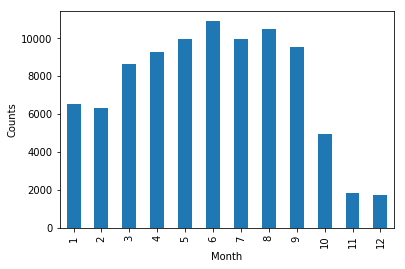

In [23]:
train_2016.month = train_2016.index.month
train_2016.month.value_counts().sort_index().plot.bar()
plt.xlabel('Month')
plt.ylabel('Counts')
plt.show()

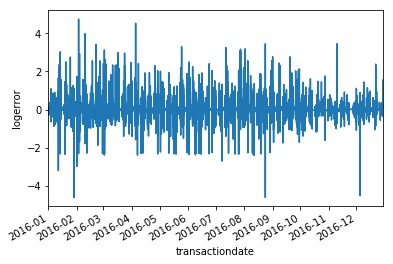

In [5]:
train_2016.logerror.plot()
plt.ylabel('logerror')
plt.show()

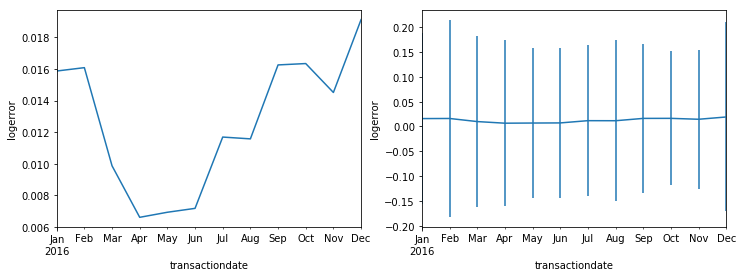

In [18]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
train_2016.logerror.resample('M').mean().plot()
plt.ylabel('logerror')
plt.subplot(1, 2, 2)
train_2016.logerror.resample('M').mean().plot(yerr=train_2016.logerror.resample('M').std())
plt.ylabel('logerror')
plt.show()

In [4]:
train_2016.logerror.describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

DescribeResult(nobs=90275, minmax=(-4.6050000000000004, 4.7370000000000001), mean=0.011457219606757128, variance=0.025946391203249233, skewness=2.168792253066565, kurtosis=131.36805081981115)


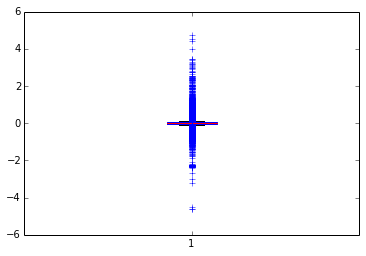

[array([-0.0253, -0.121 ]), array([ 0.0392,  0.1354])]


In [29]:
print scipy.stats.describe(train_2016.logerror)
B = plt.boxplot(train_2016.logerror)
plt.show()

0.463703198832
-0.3425


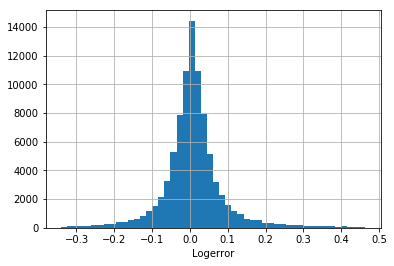

In [33]:
ulimit = np.percentile(train_2016.logerror.values, 99)
llimit = np.percentile(train_2016.logerror.values, 1)
print(ulimit)
print(llimit)
truncated_df = train_2016.loc[(train_2016.logerror<ulimit) & (train_2016.logerror>llimit), 'logerror']
truncated_df.hist(bins=50)
plt.xlabel('Logerror')
plt.show()

In [136]:
whiskers = [item.get_ydata() for item in B['whiskers']]
outlier_lower = whiskers[0][1]
outlier_upper = whiskers[1][1]
print outlier_lower
print outlier_upper

-0.121
0.1354


Logerror has a heavy tail distribution, the outlier boundaries for (q1-1.5IQR, q3+1.5IQR) are -0.121 and 0.1354.

In [36]:
train_2016.reset_index(inplace=True)
prop2016 = pd.read_csv('input/properties_2016.csv', low_memory=False)
df2016 = train_2016.merge(prop2016, on='parcelid', how='left')
del prop2016
del train_2016

In [38]:
for col in df2016.columns:
    if df2016[col].dtype == 'object':
        print col
        print df2016[col].unique().shape[0]

hashottuborspa
2
propertycountylandusecode
78
propertyzoningdesc
1997
fireplaceflag
2
taxdelinquencyflag
2


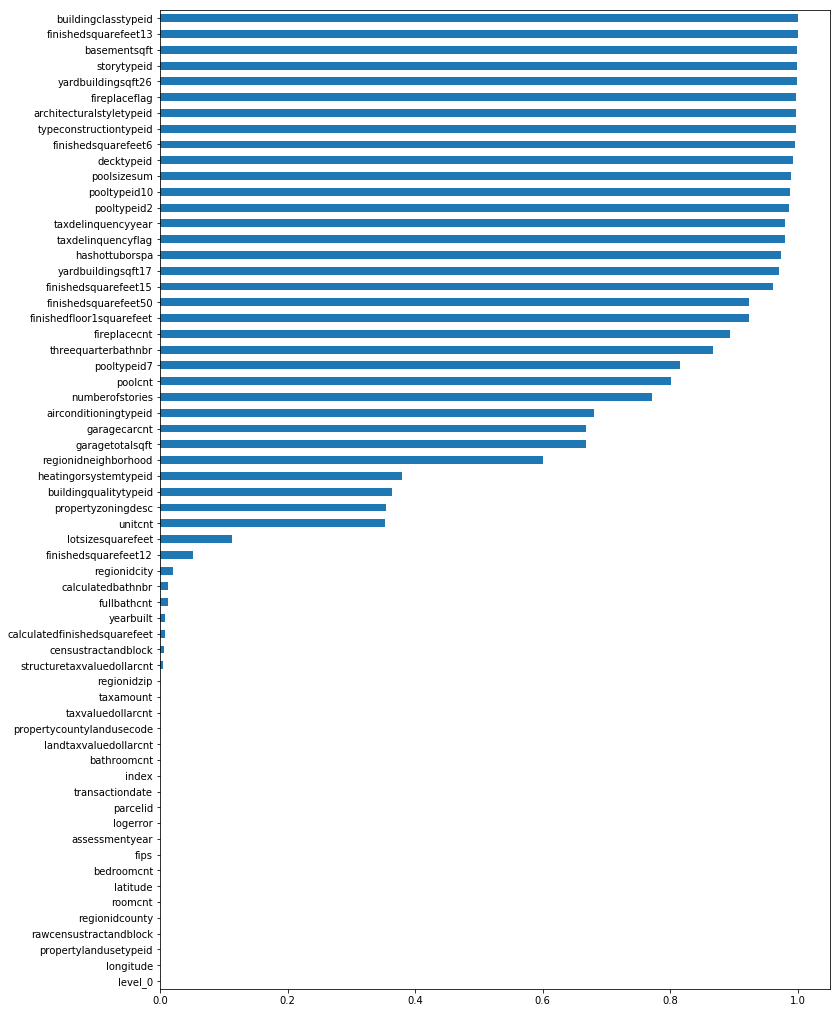

In [39]:
nrow = df2016.shape[0]
nans = df2016.isnull().sum() / nrow
nans = nans.sort_values()
fig, ax = plt.subplots(figsize=(12,18))
rects = nans.plot.barh(ax= ax)
plt.show()

In [40]:
nans[nans>0.99]

decktypeid                  0.992711
finishedsquarefeet6         0.995336
typeconstructiontypeid      0.996688
architecturalstyletypeid    0.997109
fireplaceflag               0.997541
yardbuildingsqft26          0.998948
storytypeid                 0.999524
basementsqft                0.999524
finishedsquarefeet13        0.999634
buildingclasstypeid         0.999823
dtype: float64

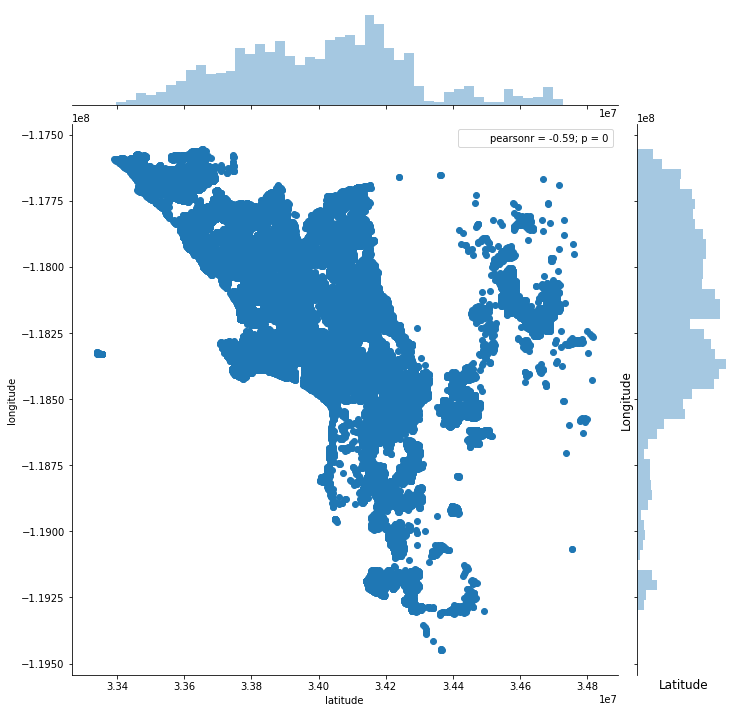

In [41]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df2016['latitude'], y=df2016['longitude'], size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

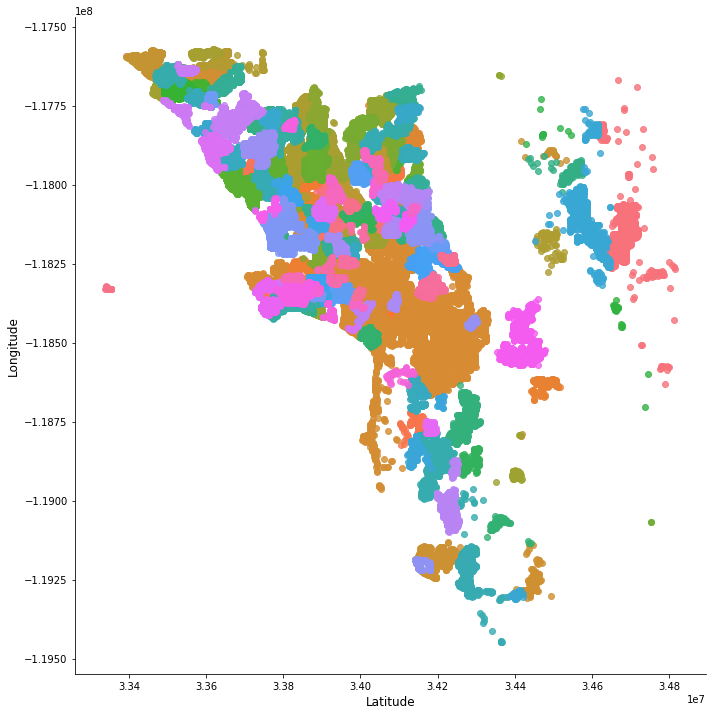

In [59]:
plt.figure(figsize=(8,8))
sns.lmplot(x='latitude', y='longitude', data=df2016, size=10, hue='regionidcity', fit_reg=False, legend=False)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

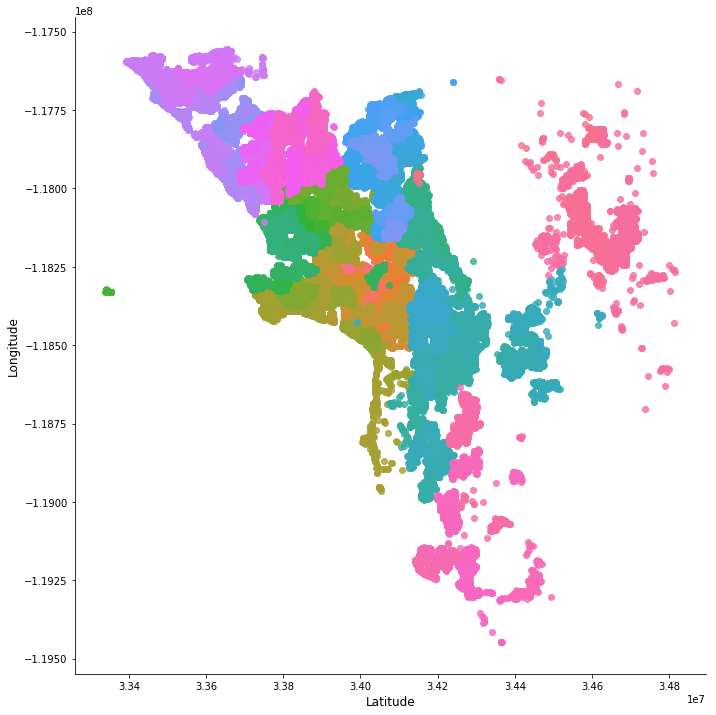

In [60]:
plt.figure(figsize=(8,8))
sns.lmplot(x='latitude', y='longitude', data=df2016, size=10, hue='regionidzip', fit_reg=False, legend=False)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

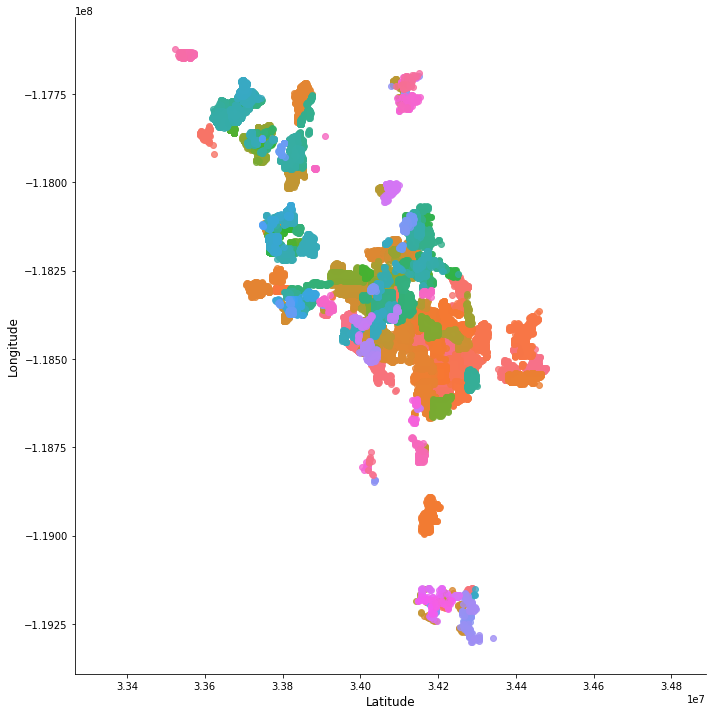

In [61]:
plt.figure(figsize=(8,8))
sns.lmplot(x='latitude', y='longitude', data=df2016, size=10, hue='regionidneighborhood', fit_reg=False, legend=False)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

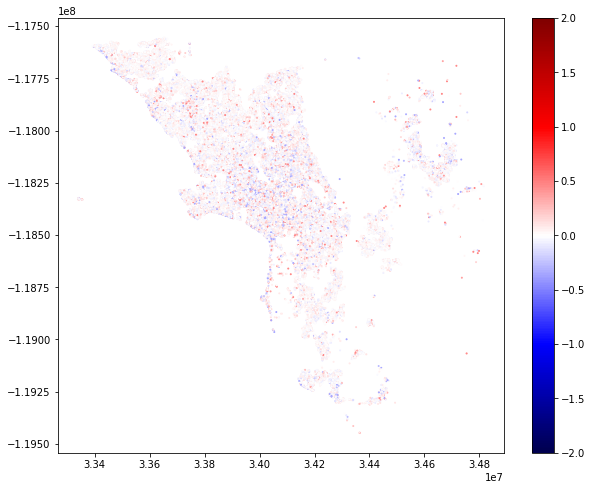

In [75]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('seismic')
sc = plt.scatter(df2016.latitude, df2016.longitude, c=df2016.logerror, vmin=-2, vmax=2, s=1, cmap=cm)
plt.colorbar(sc)
plt.show()

In [62]:
print(df2016.latitude.describe())
print(df2016.longitude.describe())

count    9.027500e+04
mean     3.400541e+07
std      2.649654e+05
min      3.333930e+07
25%      3.381154e+07
50%      3.402150e+07
75%      3.417274e+07
max      3.481601e+07
Name: latitude, dtype: float64
count    9.027500e+04
mean    -1.181989e+08
std      3.606032e+05
min     -1.194479e+08
25%     -1.184117e+08
50%     -1.181734e+08
75%     -1.179216e+08
max     -1.175549e+08
Name: longitude, dtype: float64


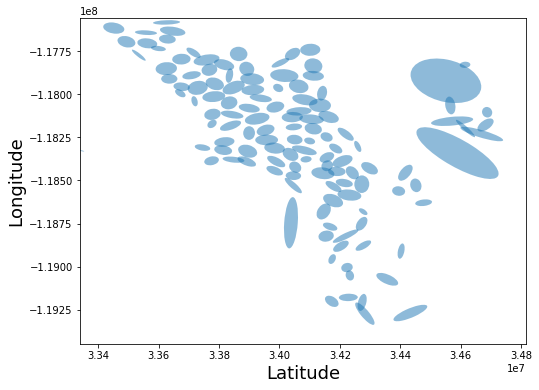

In [65]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from numpy import linalg
def create_cluster(df, n_cluster):
    """
    Create cluster by Guassian Mixture
    """
    gmm = GaussianMixture(n_components=n_cluster, covariance_type='full', random_state=1)
    gmm.fit(df[['latitude', 'longitude']])
    df['cluster'] = gmm.predict(df[['latitude', 'longitude']])
    means, covars = gmm.means_, gmm.covariances_
    fig, ax = plt.subplots(figsize=(8, 6))
    for mean, covar in zip(means, covars):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = Ellipse(mean, v[0], v[1], 180. + angle)
        # ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_patch(ell)
    urcornerlat = 3.481601e+07
    urcornerlong = -1.175549e+08
    llcornerlat = 3.333930e+07
    llcornerlong = -1.194479e+08
    plt.axis([llcornerlat, urcornerlat, llcornerlong, urcornerlong])
    plt.xlabel('Latitude', fontsize=18)
    plt.ylabel('Longitude', fontsize=18)
    plt.show()
        
create_cluster(df2016, 125)    

Since in tree based algorithm, continuous data are divided in rectangular manner. New feature named cluster might be created, giving more info to the model.

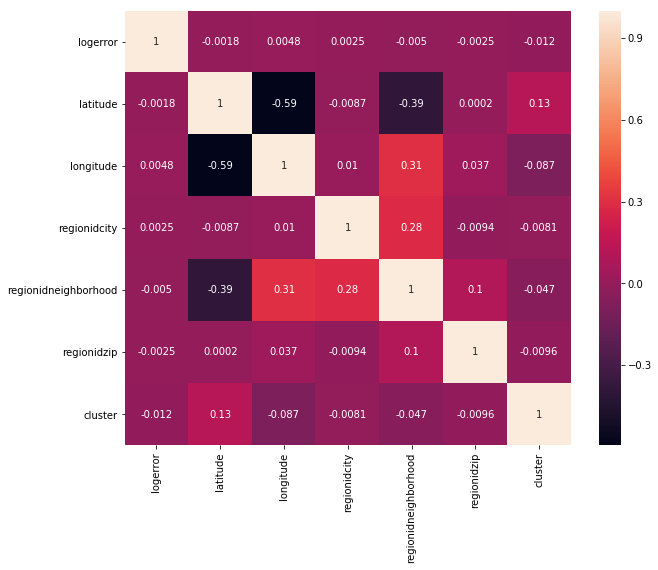

In [90]:
pos = ['logerror', 'latitude', 'longitude', 'regionidcity', 'regionidneighborhood', 'regionidzip', 'cluster']
plt.figure(figsize=(10,8))
sns.heatmap(df2016[pos].corr(), annot=True)
plt.show()

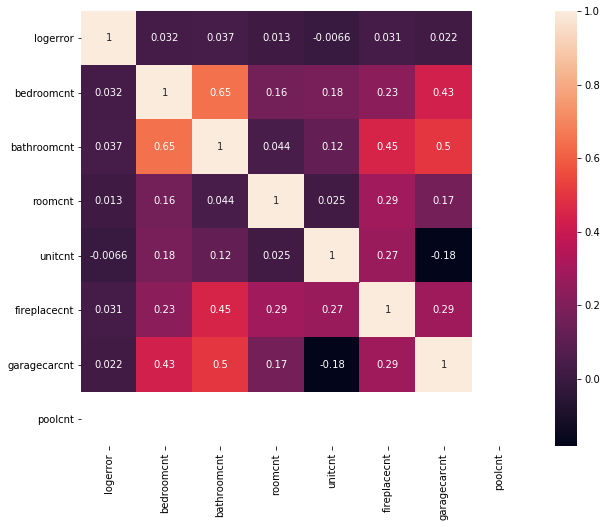

In [88]:
room = ['logerror', 'bedroomcnt', 'bathroomcnt', 'roomcnt', 'unitcnt', 'fireplacecnt', 'garagecarcnt', 'poolcnt']
plt.figure(figsize=(10,8))
sns.heatmap(df2016[room].corr(), annot=True)
plt.show()

Logerror correlate positively with most of the cnt value.

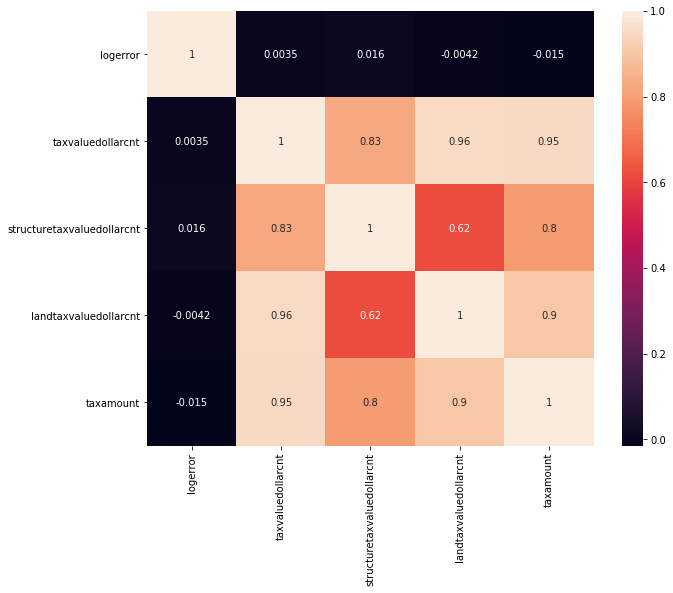

In [91]:
tax = ['logerror', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
plt.figure(figsize=(10,8))
sns.heatmap(df2016[tax].corr(), annot=True)
plt.show()

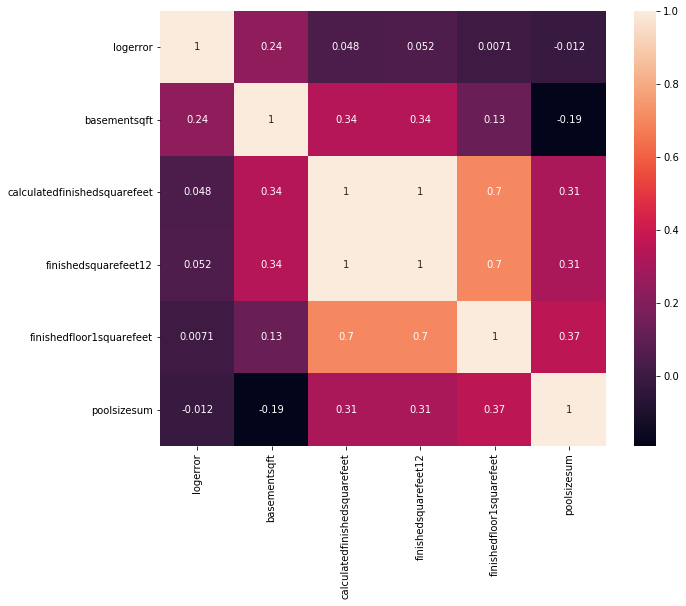

In [103]:
area = ['logerror', 'basementsqft', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedfloor1squarefeet', 
        'poolsizesum']
plt.figure(figsize=(10,8))
sns.heatmap(df2016[area].corr(), annot=True)
plt.show()

Features 'finishedsquarefeet12' and 'calculatedfinishedsquarefeet' contain exactly the same information. Delete one of it.

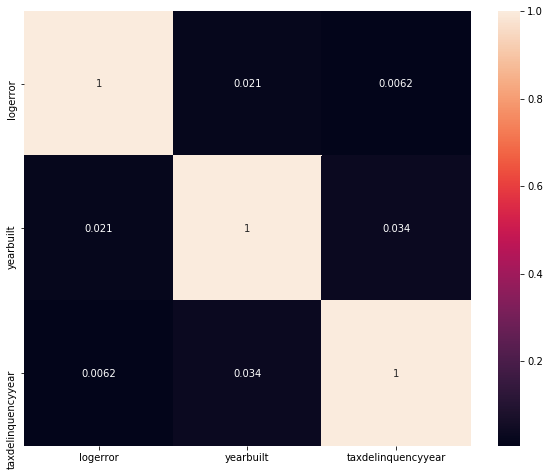

In [97]:
year = ['logerror', 'yearbuilt', 'taxdelinquencyyear']
plt.figure(figsize=(10,8))
sns.heatmap(df2016[year].corr(), annot=True)
plt.show()

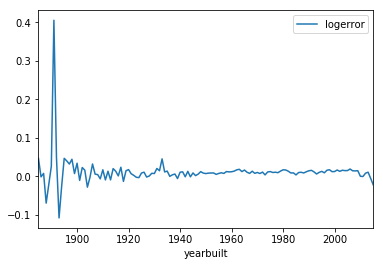

In [99]:
df2016[['logerror', 'yearbuilt']].groupby('yearbuilt').agg('mean').plot()
plt.show()

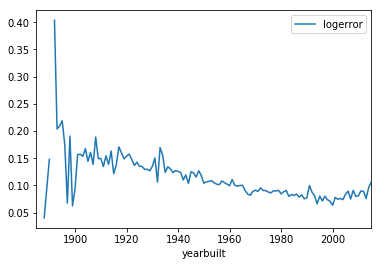

In [102]:
df2016[['logerror', 'yearbuilt']].groupby('yearbuilt').agg('std').plot()
plt.show()